In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import sklearn
from scipy.stats import stats,ttest_ind

In [2]:
path = 'featureMatrixPy.txt'
tsData = pd.read_csv(path,header=None);

In [3]:
zeros = np.zeros((100), dtype=int)
ones = np.ones((100), dtype=int)
targetCol = np.hstack((ones, zeros))
targetCol = np.reshape(targetCol,(200,1))

In [4]:
from scipy.stats import zscore
tsData_zscored = tsData.apply(zscore)

In [5]:
X = tsData_zscored
y = np.ravel(targetCol)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [6]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# Using the SVC derived from fitting to the training set, classify the test set
# and store this in a variable
y_pred = svclassifier.predict(X_test)

# Compare the predictions made by the SVC to the correct classifications
# Display the results using a confusion matrix and the classification accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('')
print('The classification accuracy of the SVM for a single random split is ' +
str(accuracy_score(y_test, y_pred) * 100) + '%')

[[ 7  0]
 [ 0 13]]

The classification accuracy of the SVM for a single random split is 100.0%


In [7]:
confMat = confusion_matrix(y_test, y_pred)
specificity = (confMat[0,0] / (confMat[0,0] + confMat[1,0])) * 100
sensitivity = (confMat[1,1] / (confMat[1,1] + confMat[0,1])) * 100
print('The specificity is ' + str("%.1f" % specificity) + '% and the sensitivity is '
+ str("%.1f" % sensitivity) + '%')
print('')

The specificity is 100.0% and the sensitivity is 100.0%



In [8]:
# Performing a 10-fold validation using cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier, X, y, cv=10) * 100
scores = scores.astype(int)

# Print scores
print('10-fold CV scores as a percentage: ' + str(scores))
print('')

avgCVScore = np.mean(scores)
print('The average 10-fold CV score is ' + str("%.1f" % avgCVScore) + '%')
print('')

10-fold CV scores as a percentage: [100 100  95 100 100 100 100 100  95 100]

The average 10-fold CV score is 99.0%



In [9]:
# Compute the t-value (from a two-tail t-test) and the p-value
# Store these two values (t-value, then p-value) in each column, 22 in total for each feature

# Initialise the array and assign its shape
tpValArray = np.zeros([2, 22])
[rows, cols] = tpValArray.shape

# Loop through the array and store the t and p values
for j in range(cols):

    # Calculate the t and p values by inputting the two halves of each of the 22 columns
    # of the normalised data into the ttest functions
    # Store the statistics in the variable, tpVal (which changes on each iteration of the outer loop)
    setE_FeatureCol = tsData.iloc[0:100,j]
    setA_FeatureCol = tsData.iloc[100:200,j]
    tpVal = stats.ttest_ind(setA_FeatureCol, setE_FeatureCol)

    for i in range(rows):

        # Store the values into each column
        tpValArray[i,j] = tpVal[i]

# Since it is a two-tailed t-test, need to multiply the p-values by two (second row)
tpValArray[1,:] = tpValArray[1,:] * 2

# Formatting the tpValArray
tpValDf = pd.DataFrame(data=tpValArray.T, columns=['t-value', 'p-value'])
print(tpValDf)

      t-value       p-value
0   -1.646650  2.024324e-01
1   -4.640577  1.262330e-05
2   -8.430390  1.413439e-14
3    0.349755  1.453788e+00
4   -0.062478  1.900491e+00
5   -0.579031  1.126453e+00
6   -2.093077  7.523217e-02
7    3.147426  3.803229e-03
8    3.366957  1.826104e-03
9  -16.637060  3.679283e-39
10   2.182296  6.052926e-02
11   0.444272  1.314662e+00
12  10.982195  6.440116e-22
13  -5.027799  2.215562e-06
14 -10.876303  1.333349e-21
15   5.418917  3.461260e-07
16  10.997517  5.795681e-22
17  -3.572155  8.891152e-04
18  22.421473  6.111434e-56
19   6.873038  1.598130e-10
20  -5.333284  5.239965e-07
21  -2.376740  3.683915e-02


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(tsData)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

targetCol_df = pd.DataFrame(data=targetCol, columns=['target'])

finalDf = pd.concat([principalDf, targetCol_df], axis = 1)

print(finalDf)

          PC1       PC2  target
0   -0.466520  0.972985       1
1   -1.715950  0.268570       1
2   -3.689212  2.210228       1
3    0.466398  2.224022       1
4    2.273560  2.025920       1
5    1.693349  1.513487       1
6    0.359110 -2.120276       1
7    2.061841  5.180776       1
8    0.378024  1.979334       1
9   -5.406274  1.937100       1
10  -2.735661  2.122185       1
11   1.842068  3.662893       1
12   0.420461  3.752155       1
13   2.247172 -0.902285       1
14   4.330223 -0.620903       1
15   9.720630 -2.325618       1
16  -1.637008  0.316295       1
17   4.577674 -1.305677       1
18   2.134502  2.645816       1
19  -0.679428  3.272365       1
20   2.768670  1.188821       1
21  -0.813806  2.083404       1
22   0.499360  0.697161       1
23  -0.512965  2.415875       1
24   3.399703  0.543144       1
25   0.887098  3.788475       1
26  -2.954070  1.048640       1
27   1.845831  2.254107       1
28   6.486638 -1.685124       1
29  -2.365089  1.899525       1
..      

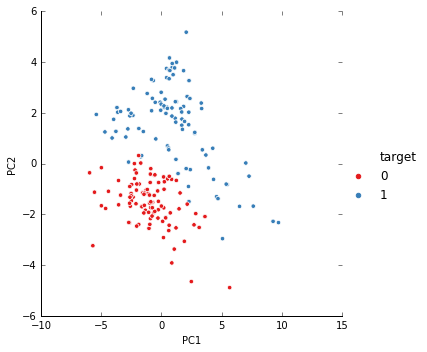

In [11]:
ax = sns.relplot(x='PC1', y='PC2', data=finalDf, hue='target',palette='Set1')
plt.show()

    Epileptic   Healthy
0    0.836006 -0.575062
1    0.836006  0.350951
2    1.806115 -0.549864
3    1.113180  0.189266
4    0.447962 -0.789583
5    0.836006 -0.999336
6   -0.905216  0.059919
7    1.667528 -0.856525
8    1.113180 -0.856525
9    2.776224 -0.960493
10   1.224050 -0.780843
11   1.321060 -0.751446
12   1.482745 -0.740422
13  -0.419430 -0.884565
14  -0.603511 -0.896332
15  -0.789583 -0.954965
16  -0.208727 -0.673053
17  -0.688451 -0.906902
18   0.836006 -0.856525
19   1.482745 -0.940250
20  -0.045912 -0.851141
21   0.836006 -0.880341
22  -0.272690 -0.933017
23   1.113180 -0.793778
24  -0.328125 -0.997411
25   1.667528 -0.875952
26   1.224050  0.836006
27   0.447962 -0.839637
28  -0.656470 -0.833484
29   1.224050 -0.925115
..        ...       ...
70  -0.619158 -0.866635
71   1.113180 -0.866635
72   0.447962 -0.522147
73  -0.716169 -0.789583
74   1.667528 -0.880341
75   1.806115 -0.906902
76  -0.134103 -0.892552
77   0.558832 -0.241893
78   1.482745 -0.951037
79   1.667528 -0

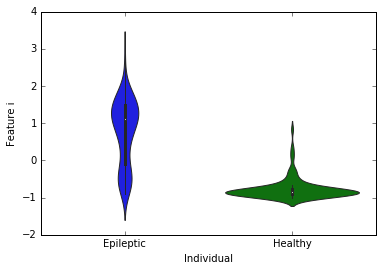

In [12]:
# Obtaining Seizure_Feature1 & Healthy_Feature1
sf1 = X.iloc[0:100,9]
hf1 = X.iloc[100:200,9]

feat1 = np.column_stack((sf1,hf1))

df_feat1 = pd.DataFrame(data=feat1, columns=['Epileptic', 'Healthy'])
print(df_feat1)

# Violin plots
ax = sns.violinplot(data=df_feat1, order=["Epileptic", "Healthy"])
plt.xlabel('Individual')
plt.ylabel('Feature i')
plt.show()